In [ ]:
# Logistic Regression

# Objective: Identify how various factors contribute to a country's happiness level, specifically focusing on positive affect (binarized as "happy" or "not happy").

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from past.builtins import xrange
from scipy.special import expit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

%matplotlib inline

In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['data']


In [ ]:
path1 = GOOGLE_DRIVE_PATH + 'data/WorldHappinessReport2024.csv'
df_world_happiness = pd.read_csv(path1)

path2 = GOOGLE_DRIVE_PATH + 'data/CountryComparisonLargeDataset.csv'
df_country_comparison = pd.read_csv(path2)

pd.set_option('display.max_columns', None)
#display part of the dataset.
display(df_world_happiness.head())
df_world_happiness.shape
display(df_country_comparison.head())
df_country_comparison.shape
df_world_happiness.shape

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,Literacy Rate (%),Education Expenditure as % of GDP,Internet Penetration (%),Smartphone Adoption (%),Energy Consumption (TWh),Renewable Energy Share (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,CO2 Emissions (Million Metric Tons),Forest Coverage (%),Number of Airports,Road Network Length (in km),Public Transport Usage (%),Human Development Index (HDI),Gender Equality Index,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,United States,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,2.60,100.78,5.12,84.73,88.23,4095.0,17.31,724.68,1464400.0,5156.10,31.88,13869.00,6626400,11.74,0.97,0.94,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,4.05,103.55,4.37,84.84,72.88,1058.4,18.60,62.13,986000.0,1660.80,49.15,1251.60,1429500,24.00,0.85,0.72,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,2.84,98.31,5.69,89.75,85.99,559.9,68.81,22.58,67972.5,516.78,36.18,501.50,985000,17.51,0.96,0.94,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,1.86,98.65,4.02,66.56,71.12,6698.0,28.94,255.52,2045900.0,9690.00,22.00,230.16,4995000,35.50,0.72,0.85,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,0.86,73.11,3.19,46.40,41.98,1500.0,11.50,70.01,1475768.0,2443.20,24.48,258.50,5929500,23.09,0.67,0.66,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


(2363, 11)

In [ ]:
df_world_happiness.info()
df_world_happiness.shape
# missing values in "Log GDP per capita", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity","Perceptions of corruption",
# "Positive affect", and "Negative affect"


# renaming columns
df_world_happiness.rename(columns={'Country name': 'Country', 'year': 'Year'}, inplace=True)
df_world_happiness.info()

df_world_happiness = df_world_happiness[df_world_happiness['Country'].isin(['United States', 'Canada','India','Russia','Australia','China'])]
df_world_happiness.info()
unique_values = df_world_happiness['Country'].unique()
print(unique_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
<class 'pa

In [ ]:
display(df_country_comparison.head())

# rename USA to United States to match the world happiness dataset

df_country_comparison['Country'] = df_country_comparison['Country'].replace('USA', 'United States')

#stripping white space
df_world_happiness.columns = df_world_happiness.columns.str.strip()
df_country_comparison.columns = df_country_comparison.columns.str.strip()

merged_df = pd.merge(df_world_happiness, df_country_comparison, on=['Country', 'Year'], how='inner')

merged_df.head()
merged_df.shape

merged_df.info()

# missing values in
# social support
# freedom to make life choices
# perceptions of corruption
# generosity

,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,Literacy Rate (%),Education Expenditure as % of GDP,Internet Penetration (%),Smartphone Adoption (%),Energy Consumption (TWh),Renewable Energy Share (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,CO2 Emissions (Million Metric Tons),Forest Coverage (%),Number of Airports,Road Network Length (in km),Public Transport Usage (%),Human Development Index (HDI),Gender Equality Index,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,United States,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,2.60,100.78,5.12,84.73,88.23,4095.0,17.31,724.68,1464400.0,5156.10,31.88,13869.00,6626400,11.74,0.97,0.94,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,4.05,103.55,4.37,84.84,72.88,1058.4,18.60,62.13,986000.0,1660.80,49.15,1251.60,1429500,24.00,0.85,0.72,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,2.84,98.31,5.69,89.75,85.99,559.9,68.81,22.58,67972.5,516.78,36.18,501.50,985000,17.51,0.96,0.94,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,1.86,98.65,4.02,66.56,71.12,6698.0,28.94,255.52,2045900.0,9690.00,22.00,230.16,4995000,35.50,0.72,0.85,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,0.86,73.11,3.19,46.40,41.98,1500.0,11.50,70.01,1475768.0,2443.20,24.48,258.50,5929500,23.09,0.67,0.66,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  104 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    101 non-null    float64
 7   Generosity                                      102 non-null    float64
 8   Perceptions of corruption                       89 non-null     float64
 9   Positive affect                            

In [ ]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Generosity'].median()
median_value = int(median_value)
merged_df['Generosity']= merged_df['Generosity'].fillna(median_value)

In [ ]:
# Social support filling in the missing data
median_value = merged_df['Social support'].median()
median_value = int(median_value)
merged_df['Social support']= merged_df['Social support'].fillna(median_value)

In [ ]:
# Perceptions of corruption filling in the missing data
median_value = merged_df['Perceptions of corruption'].median()
median_value = int(median_value)
merged_df['Perceptions of corruption']= merged_df['Perceptions of corruption'].fillna(median_value)

In [ ]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Freedom to make life choices'].median()
median_value = int(median_value)
merged_df['Freedom to make life choices']= merged_df['Freedom to make life choices'].fillna(median_value)

In [ ]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  106 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    106 non-null    float64
 7   Generosity                                      106 non-null    float64
 8   Perceptions of corruption                       106 non-null    float64
 9   Positive affect                            

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,Literacy Rate (%),Education Expenditure as % of GDP,Internet Penetration (%),Smartphone Adoption (%),Energy Consumption (TWh),Renewable Energy Share (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,CO2 Emissions (Million Metric Tons),Forest Coverage (%),Number of Airports,Road Network Length (in km),Public Transport Usage (%),Human Development Index (HDI),Gender Equality Index,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2014.462264,6.114565,10.089651,0.829477,66.060047,0.791166,0.051330,0.546397,0.690947,0.236934,7.190472,31014.214151,2.667075,549.006698,0.700094,69.669717,77.277547,3767.926698,2.597453,94.679528,4.545000,77.689528,73.467453,2355.213208,27.928491,196.351887,1.006191e+06,3310.310849,30.456792,2771.691981,3.484138e+06,21.455189,0.836509,0.846415,11.065849,35.280472,82.521698,38.206887,5.005849,61.019717,474.921698,55.073774,92.285377,69.885755
std,5.215681,1.185722,0.902424,0.168624,4.565608,0.200702,0.190152,0.301657,0.081433,0.065683,7.865594,24446.951145,1.074794,600.882860,0.415689,17.937752,5.358470,3947.853012,1.034177,9.709949,0.891148,17.555438,16.109408,2305.291536,18.709700,255.808580,7.366853e+05,3326.301020,11.001542,4924.172048,2.416617e+06,7.006244,0.113499,0.128294,5.855160,27.231909,70.832695,21.017962,1.341535,5.626838,290.923446,18.618202,65.405531,10.521994
min,2005.000000,3.248770,8.141137,0.000000,55.860001,0.000000,-0.312144,0.000000,0.479760,0.111518,1.270000,2016.000000,1.440000,24.120000,0.100000,33.600000,66.140000,69.420000,0.870000,71.260000,2.960000,42.880000,38.950000,288.600000,11.410000,21.320000,5.515800e+04,394.010000,15.260000,228.480000,8.334600e+05,11.440000,0.610000,0.630000,1.910000,9.050000,26.850000,6.730000,3.430000,47.700000,95.300000,28.560000,15.280000,57.240000
25%,2010.000000,5.144548,9.395759,0.787280,62.369999,0.745741,-0.106017,0.392448,0.617724,0.191014,1.630000,9957.500000,1.890000,37.370000,0.300000,59.940000,72.870000,441.000000,1.787500,94.505000,4.002500,65.307500,69.370000,549.450000,16.955000,27.132500,6.829312e+04,550.935000,22.135000,247.625000,1.013500e+06,17.170000,0.770000,0.720000,9.327500,10.977500,30.015000,12.970000,3.760000,58.665000,250.750000,40.000000,25.297500,63.452500
50%,2014.500000,6.332818,10.454458,0.902833,66.689999,0.849600,0.079660,0.616672,0.711184,0.233196,2.275000,27548.000000,2.340000,233.340000,0.745000,77.330000,77.725000,2755.500000,2.750000,97.680000,4.590000,86.685000,79.425000,1263.900000,19.820000,65.935000,1.194900e+06,1981.600000,31.615000,547.950000,3.160500e+06,20.345000,0.870000,0.880000,10.090000,23.370000,36.525000,45.055000,4.760000,62.025000,395.350000,54.820000,90.220000,67.400000
75%,2019.000000,7.192138,10.794382,0.928877,70.514997,0.911518,0.212246,0.780634,0.759562,0.268029,14.330000,52165.250000,3.080000,1346.535000,1.005000,83.110000,81.532500,5384.60

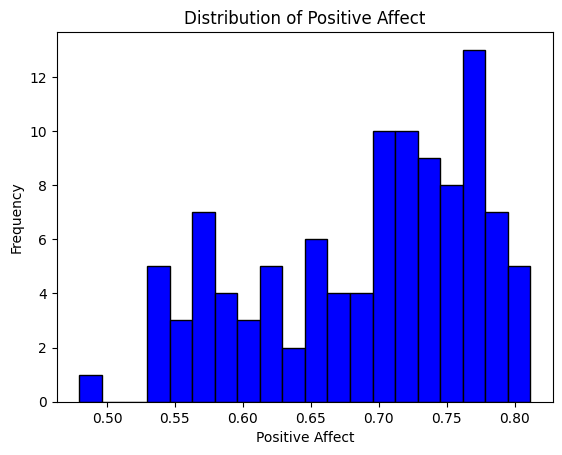

count    106.000000
mean       0.690947
std        0.081433
min        0.479760
25%        0.617724
50%        0.711184
75%        0.759562
max        0.811577
Name: Positive affect, dtype: float64


In [ ]:

# Plot the distribution of Positive Affect
plt.hist(merged_df['Positive affect'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Positive Affect')
plt.xlabel('Positive Affect')
plt.ylabel('Frequency')
plt.show()

# Print descriptive statistics of Positive Affect
print(merged_df['Positive affect'].describe())


In [ ]:
# Calculate the median of 'Positive affect'
median_positive_affect = merged_df['Positive affect'].median()

# Create the binary 'Happy' column using the median as the threshold
merged_df['Happy'] = (merged_df['Positive affect'] >= median_positive_affect).astype(int)

# Check the distribution of the new target column
print(merged_df['Happy'].value_counts())


Happy
1    53
0    53
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select all relevant numeric features (excluding categorical ones like 'Country')
relevant_features = [
    col for col in merged_df.columns
    if col not in ['Country', 'Year', 'Happy', 'Positive affect', 'Negative affect',
                   'Life Ladder', 'Log GDP per capita', 'Perceptions of corruption']
]

X = merged_df[relevant_features]
y = merged_df['Happy']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso Logistic Regression
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
lasso.fit(X_scaled, y)

# Extract coefficients
coefficients = pd.Series(lasso.coef_[0], index=relevant_features)

# Sort coefficients by absolute value
sorted_coefficients = coefficients.sort_values(key=abs, ascending=False)
print("Feature Coefficients (sorted by importance):")
print(sorted_coefficients)

Feature Coefficients (sorted by importance):
Freedom to make life choices                      1.703023
Healthcare Expenditure per Capita (USD)           1.244616
Renewable Energy Share (%)                        0.985086
Education Expenditure as % of GDP                 0.701287
Corruption Perception Index                       0.409985
Healthy life expectancy at birth                  0.261029
Tourism Revenue (in Billion USD)                  0.121438
Social support                                    0.000000
Gender Equality Index                             0.000000
Road Network Length (in km)                       0.000000
Public Transport Usage (%)                        0.000000
Human Development Index (HDI)                     0.000000
Number of International Visitors (in Millions)    0.000000
Poverty Rate (%)                                  0.000000
Forest Coverage (%)                               0.000000
Agricultural Land (%)                             0.000000
Unemploymen

In [ ]:
# Create a dataframe for the six most relevant features

# Create a DataFrame for the six most important features
top_6_features = sorted_coefficients.head(6).index.tolist()
df_top_6 = merged_df[top_6_features]

In [ ]:
from sklearn.model_selection import train_test_split

# Use only features with non-zero coefficients
top_features = df_top_6.columns[df_top_6.any()].tolist()

# Define X (features) and y (target)
X = merged_df[top_features]
y = merged_df['Happy']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm data shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (84, 6)
X_test shape: (22, 6)
y_train shape: (84,)
y_test shape: (22,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy on the test set: 0.8636363636363636

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      0.83      0.87        12

    accuracy                           0.86        22
   macro avg       0.86      0.87      0.86        22
weighted avg       0.87      0.86      0.86        22



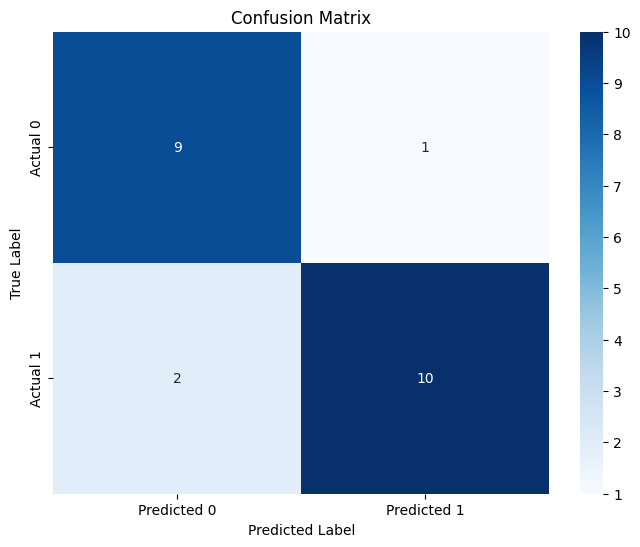

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Retrieve and interpret coefficients
import pandas as pd

coefficients = pd.Series(model.coef_[0], index=top_features)
print("Feature Coefficients:")
print(coefficients.sort_values(ascending=False))


Feature Coefficients:
Freedom to make life choices               1.204955
Healthcare Expenditure per Capita (USD)    1.071509
Corruption Perception Index                0.893295
Education Expenditure as % of GDP          0.841710
Healthy life expectancy at birth           0.594461
Renewable Energy Share (%)                 0.474961
dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.94117647 1.         0.94117647 0.94117647 1.        ]
Mean CV Accuracy: 0.9647058823529411


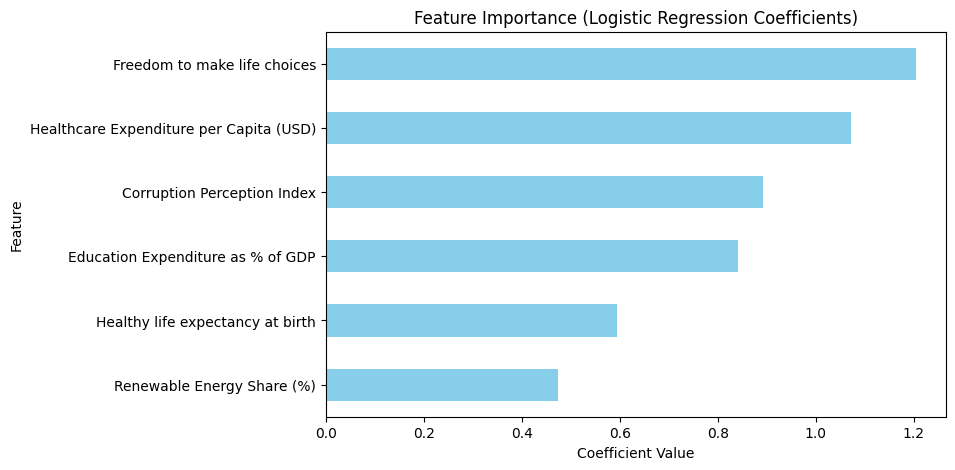

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of feature coefficients
coefficients.sort_values(ascending=True).plot(kind='barh', color='skyblue', figsize=(8, 5))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

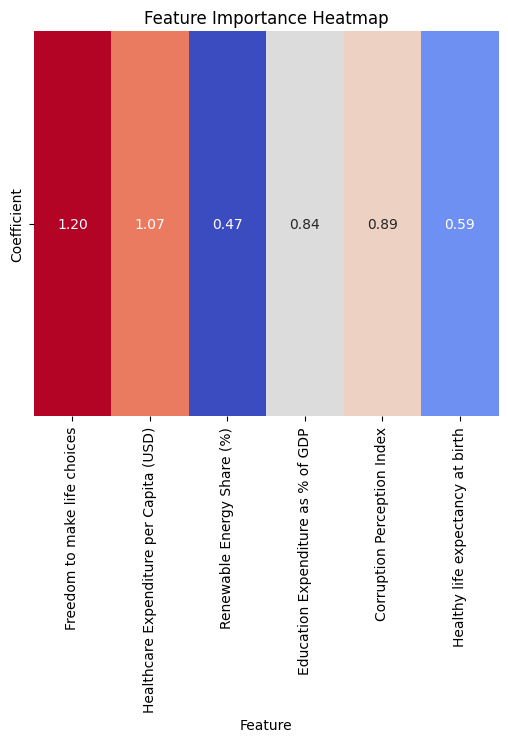

In [ ]:
import seaborn as sns

# Convert coefficients to DataFrame
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Coefficient': coefficients.values})

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(feature_importance_df.set_index('Feature').T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title("Feature Importance Heatmap")
plt.show()

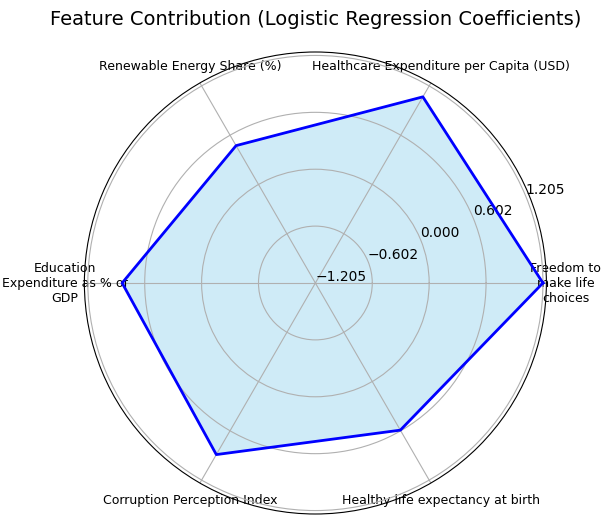

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Convert to a circular format for radar plot
angles = np.linspace(0, 2 * np.pi, len(top_features), endpoint=False).tolist()

# Use the actual coefficients
values = coefficients.tolist()
values += values[:1]
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})
ax.fill(angles, values, color="skyblue", alpha=0.4)
ax.plot(angles, values, color="blue", linewidth=2)

# Adjust y-ticks based on coefficient range
max_coef = max(abs(c) for c in values)
ax.set_yticks(np.linspace(-max_coef, max_coef, 5))

ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_features, fontsize=9, wrap=True)
ax.set_title("Feature Contribution (Logistic Regression Coefficients)", size=14, pad=20)

plt.show()